# Using Facebook Prophet model to predict HK stock price

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

https://facebook.github.io/prophet/

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
# Load dataset (past 6 months data)
data = pd.read_csv("./stock_data/1299.HK.6months.csv") 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-28,76.300003,76.900002,75.900002,76.900002,75.507645,41504793
1,2020-03-02,77.000000,77.550003,76.300003,76.449997,75.065788,31230325
2,2020-03-03,76.500000,77.250000,75.300003,75.500000,74.132988,31135827
3,2020-03-04,76.000000,76.000000,74.900002,75.050003,73.691139,29495534
4,2020-03-05,76.699997,77.650002,75.750000,77.650002,76.244064,36107180


In [3]:
# Describe dataset
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02
mean,80.292713,81.040688,78.942510,79.958097,79.544371,2.741304e+07
std,11.338782,11.398077,11.111253,11.333094,11.687667,1.334581e+07
min,61.099998,63.099998,60.049999,60.700001,59.600964,0.000000e+00
25%,72.000000,72.525002,70.575001,71.700001,70.763550,1.871740e+07
50%,76.699997,77.900002,75.800003,76.650002,76.400002,2.410256e+07
75%,88.974998,89.575001,87.550003,88.250000,88.250000,3.284126e+07
max,108.400002,109.300003,104.500000,108.900002,108.900002,8.448093e+07


In [4]:
# Select date and price features from dataset
data = data[["Date", "Close"]]
# Rename the features for the model fitting
data = data.rename(columns = {"Date":"ds", "Close":"y"})
data.head(5)

,ds,y
0,2020-02-28,76.900002
1,2020-03-02,76.449997
2,2020-03-03,75.500000
3,2020-03-04,75.050003
4,2020-03-05,77.650002


In [5]:
# Fit the model using all data (past 6 months data)
m = Prophet(daily_seasonality = True)
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


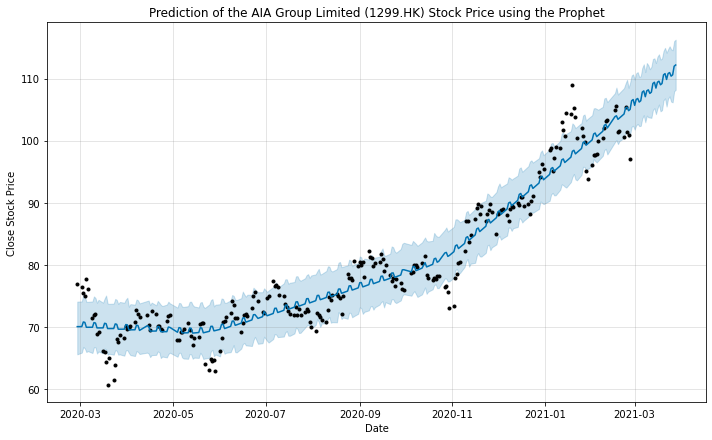

In [6]:
# Plot the model with next 30 days forcast
future = m.make_future_dataframe(periods=30)
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the AIA Group Limited (1299.HK) Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [7]:
# Load dataset (past 3 months data)
data2 = pd.read_csv("./stock_data/1299.HK.3months.csv") 
data2.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-30,88.500000,89.150002,84.949997,84.949997,84.949997,35518927
1,2020-12-01,86.750000,88.349998,86.349998,88.199997,88.199997,26930347
2,2020-12-02,88.349998,88.599998,87.000000,88.300003,88.300003,20086955
3,2020-12-03,88.750000,89.000000,87.550003,88.900002,88.900002,17287337
4,2020-12-04,88.699997,89.050003,87.550003,89.000000,89.000000,21877325


In [8]:
# Describe dataset
data2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,96.982787,97.935246,95.354099,96.759017,96.759017,2.229489e+07
std,5.982362,6.189665,5.756513,6.040361,6.040361,8.523874e+06
min,86.750000,87.550003,84.949997,84.949997,84.949997,0.000000e+00
25%,91.150002,91.150002,89.250000,90.250000,90.250000,1.741182e+07
50%,97.500000,98.750000,96.199997,97.750000,97.750000,2.265087e+07
75%,102.000000,103.000000,100.099998,101.400002,101.400002,2.716702e+07
max,108.400002,109.300003,104.500000,108.900002,108.900002,4.195539e+07


In [9]:
# Select date and price features from dataset
data2 = data2[["Date", "Close"]]
# Rename the features for the model fitting
data2 = data2.rename(columns = {"Date":"ds", "Close":"y"})
data2.head(5)

,ds,y
0,2020-11-30,84.949997
1,2020-12-01,88.199997
2,2020-12-02,88.300003
3,2020-12-03,88.900002
4,2020-12-04,89.000000


In [10]:
# Fit the model using all data (past 3 months data)
m2 = Prophet(daily_seasonality = True)
m2.fit(data2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


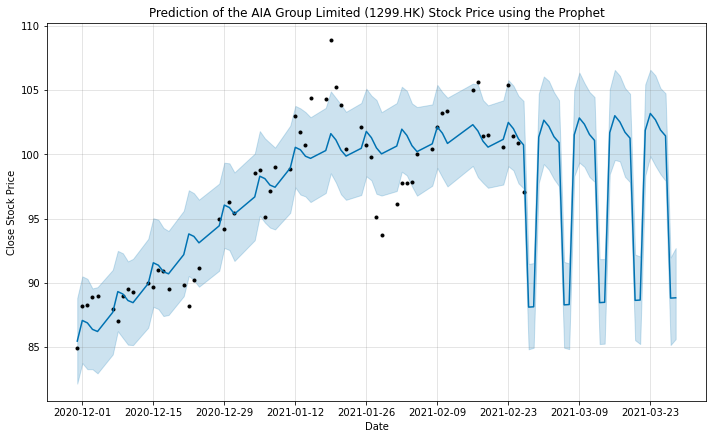

In [11]:
# Plot the model with next 30 days forcast
future = m2.make_future_dataframe(periods=30)
prediction = m2.predict(future)
m2.plot(prediction)
plt.title("Prediction of the AIA Group Limited (1299.HK) Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [12]:
# Load dataset (past 1 year data)
data3 = pd.read_csv("./stock_data/1299.HK.1year.csv") 
data3.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,77.699997,79.199997,77.050003,78.500000,77.078674,35847965
1,2020-02-04,80.550003,80.550003,78.849998,79.250000,77.815086,29228951
2,2020-02-05,80.000000,80.500000,78.800003,79.300003,77.864182,32494430
3,2020-02-06,80.599998,81.650002,79.449997,81.050003,79.582497,31218255
4,2020-02-07,80.800003,80.800003,79.449997,80.199997,78.747887,17885567


In [13]:
# Describe dataset
data3.describe()

,Open,High,Low,Close,Adj Close,Volume
count,266.000000,266.000000,266.000000,266.000000,266.000000,2.660000e+02
mean,80.240226,80.978196,78.927068,79.921241,79.434325,2.693857e+07
std,10.934664,10.989758,10.711176,10.924873,11.272387,1.310346e+07
min,61.099998,63.099998,60.049999,60.700001,59.600964,0.000000e+00
25%,72.275000,72.612499,71.012501,71.900002,71.129394,1.823790e+07
50%,77.450001,78.250000,76.625000,77.549999,77.065685,2.375759e+07
75%,88.324998,88.900000,86.387501,87.824997,87.824997,3.198056e+07
max,108.400002,109.300003,104.500000,108.900002,108.900002,8.448093e+07


In [14]:
# Select date and price features from dataset
data3 = data3[["Date", "Close"]]
# Rename the features for the model fitting
data3 = data3.rename(columns = {"Date":"ds", "Close":"y"})
data3.head(5)

,ds,y
0,2020-02-03,78.500000
1,2020-02-04,79.250000
2,2020-02-05,79.300003
3,2020-02-06,81.050003
4,2020-02-07,80.199997


In [15]:
# Fit the model using all data (past 1 year data)
m3 = Prophet(daily_seasonality = True)
m3.fit(data3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


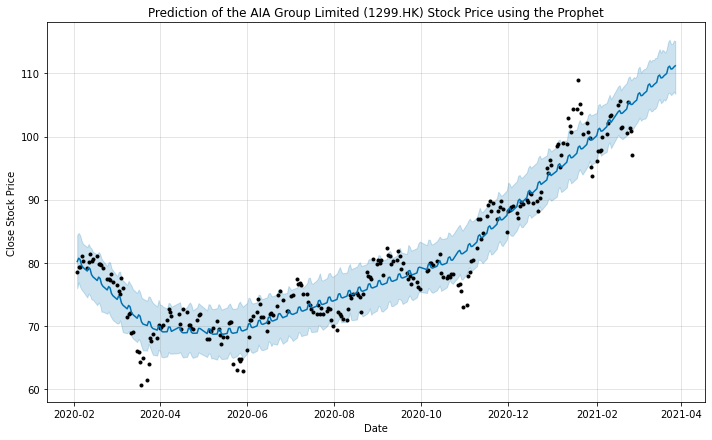

In [16]:
# Plot the model with next 30 days forcast
future = m3.make_future_dataframe(periods=30)
prediction = m3.predict(future)
m3.plot(prediction)
plt.title("Prediction of the AIA Group Limited (1299.HK) Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()